In [ ]:
!pip install earthpy
!pip install rasterio

In [1]:
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import os
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mount Google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#all the files should be placed in the correct folder
path = '/content/drive/My Drive/Mosul/Sentinel_2/'
import sys 
sys.path.insert(0, path)
%cd /content/drive/My Drive/Mosul//Sentinel_2/
%pwd

/content/drive/My Drive/Mosul/Sentinel_2


'/content/drive/My Drive/Mosul/Sentinel_2'

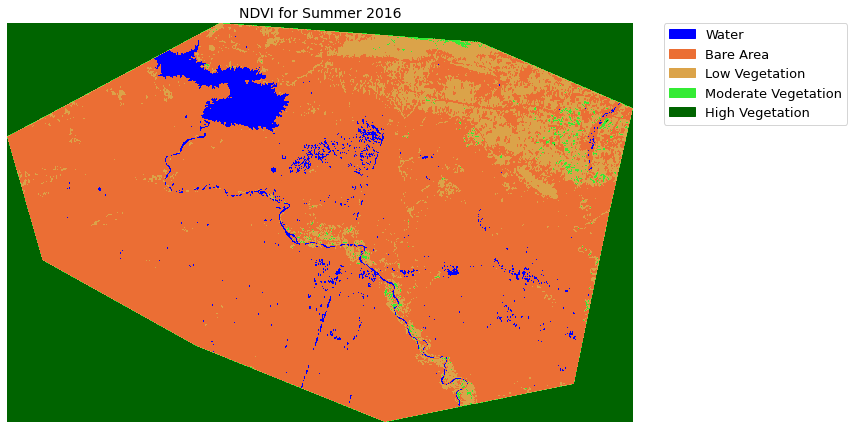

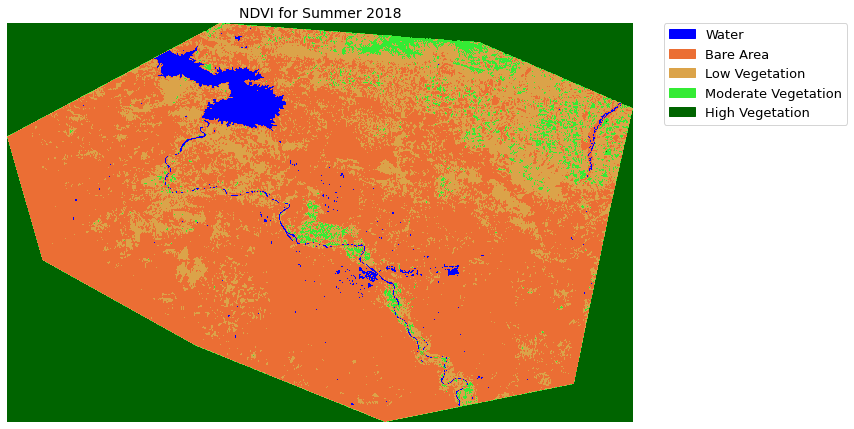

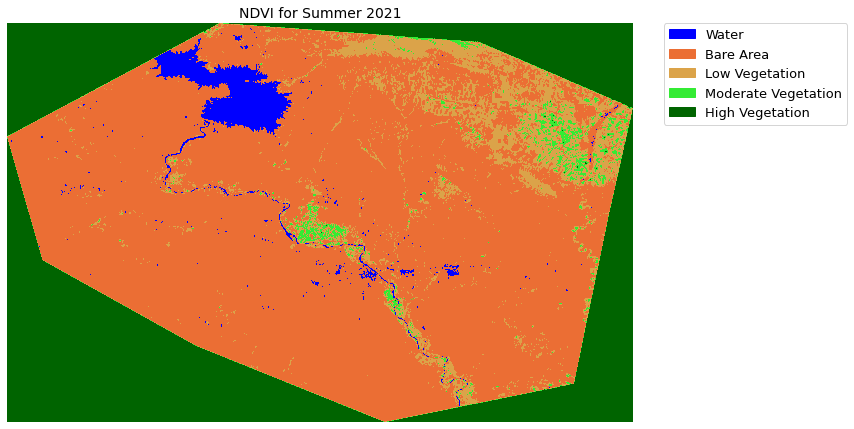

In [4]:
#NDVI analysis

def plot_data(data, classes, categories, year):
    #plotting the data
    #fig, ax = plt.subplots(1,2, figsize =(12,15))
    fig, ax = plt.subplots(figsize =(12,15))
    im = ax.imshow(data, cmap=nbr_cmap)

    ep.draw_legend(im_ax=im, classes=classes, titles=categories)
    ax.set_title(
      "NDVI for Summer "+ year,
      fontsize=14,
    )
    ax.set_axis_off()
    ax.set_facecolor("white")
    # Auto adjust subplot to fit figure size
    plt.tight_layout()


file1 = 'indices_2016.tif'
file2 = 'indices_2018.tif'
file3 = 'indices_2021.tif'

data_1 = rio.open(file1)
data_2 = rio.open(file2)
data_3 = rio.open(file3)

ndvi_1 = data_1.read(1)
ndvi_2 = data_2.read(1)
ndvi_3 = data_3.read(1)

# Define class names
ndvi_cat_names = [
    "Water",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Define color map
#nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
#nbr_colors = ["blue", "#DBA349", "#34eb34", "#49DB5D", "darkgreen"]
nbr_colors = ["blue","#eb6e34", "#DBA349", "#34eb34", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, 1]
ndvi_class_1 = np.digitize(ndvi_1, ndvi_class_bins)
ndvi_class_2 = np.digitize(ndvi_2, ndvi_class_bins)
ndvi_class_3 = np.digitize(ndvi_3, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_masked_class_1 = np.ma.masked_where(
      np.ma.getmask(ndvi_1), ndvi_class_1
)
# Get list of classes
classes = np.unique(ndvi_class_1)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]


ndvi_masked_class_2 = np.ma.masked_where(
        np.ma.getmask(ndvi_2), ndvi_class_2
)

ndvi_masked_class_3 = np.ma.masked_where(
        np.ma.getmask(ndvi_3), ndvi_class_3
)




plot_data(ndvi_masked_class_1, classes, ndvi_cat_names, '2016')
plot_data(ndvi_masked_class_2, classes, ndvi_cat_names, '2018')
plot_data(ndvi_masked_class_3, classes, ndvi_cat_names, '2021')



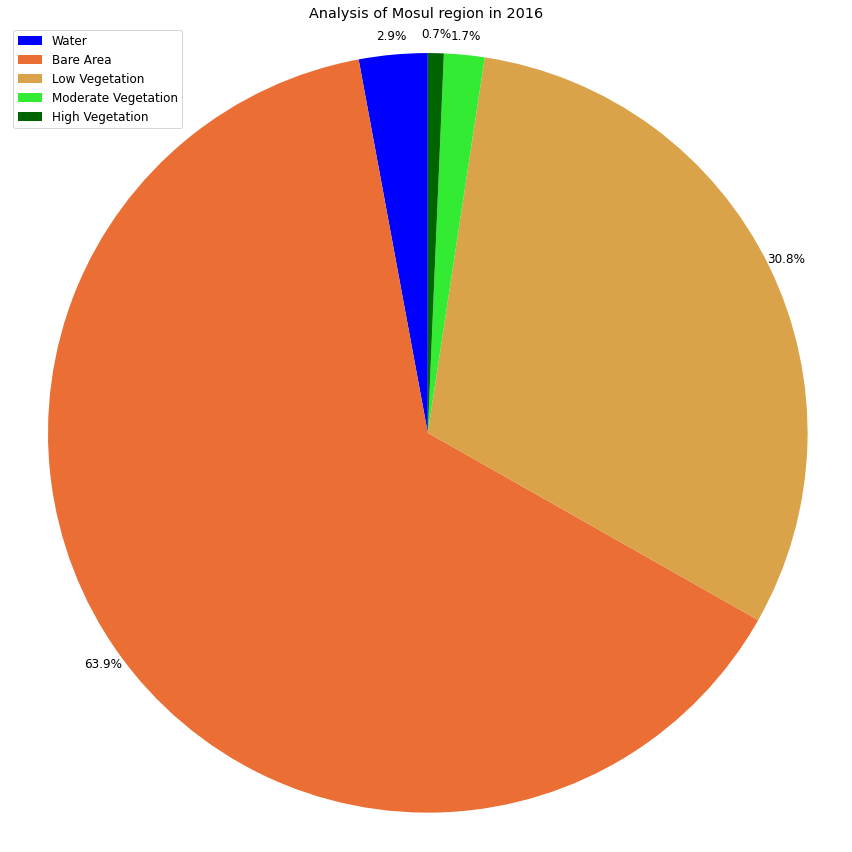

In [14]:
import matplotlib

def plot_pie_chart(index, year, labels, sizes):
  # Pie chart, where the slices will be ordered and plotted counter-clockwise:
  #labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
  #sizes = [10, 10, 10, 20,50]
  #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
  #fig1 = plt.gcf()
  #fig1.set_size_inches(1,1) 
  #ax = fig1.add_axes((0,0,.5,1))
  fig1, ax1 = plt.subplots(figsize =(12, 12))
  matplotlib.rcParams.update({'font.size': 12})
  #ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  nbr_colors = ["blue","#eb6e34", "#DBA349", "#34eb34", "darkgreen"]
  ax1.pie(sizes, colors = nbr_colors, autopct='%1.1f%%', startangle=90, pctdistance=1.05, labeldistance=1.2)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title('Analysis of Mosul region in '+ year)
  plt.legend(labels = labels)
  plt.tight_layout()
  plt.show()  


labels = []
for i in range(1, 6):
  labels.append(len(ndvi_class_1[ndvi_class_1[:, :] == i]))
plot_pie_chart(index='ndvi', year = '2016', labels=ndvi_cat_names, sizes = labels)

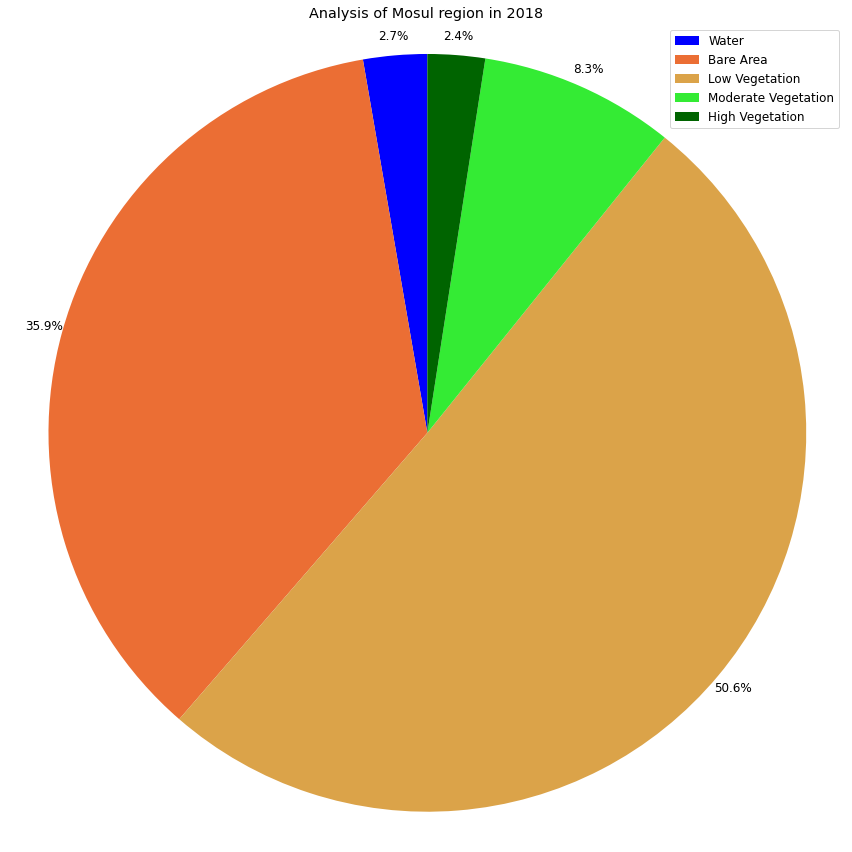

In [15]:
labels = []
for i in range(1, 6):
  labels.append(len(ndvi_class_2[ndvi_class_2[:, :] == i]))
  
plot_pie_chart(index='ndvi', year = '2018', labels=ndvi_cat_names, sizes = labels)

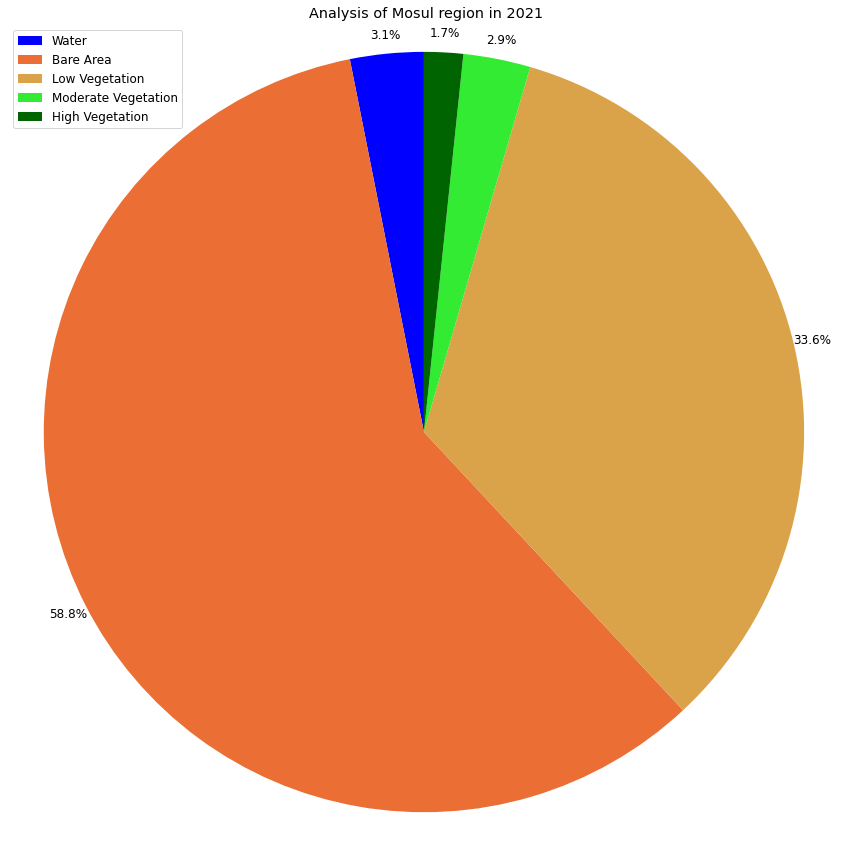

In [16]:
labels = []
for i in range(1, 6):
  labels.append(len(ndvi_class_3[ndvi_class_3[:, :] == i]))
plot_pie_chart(index='ndvi', year = '2021', labels=ndvi_cat_names, sizes = labels)

# **Conclusion**

* We collected Sentinel2 data for the region of Mosul from Google Earth Engine. The data was collected for summer time as the cloud cover will be less in this period of time.

* Created indices like NDVI, NDWI, NDBI, MSAVI using differnt combination of bands in the data.

* We analysed the NDVI values for the years 2016, 2018 and 2021. As per the results, the arid region has reduced from 63.9% in 2016 to 58.8% in 2021 which seems to be a good indication.


# **Future Works**

* Due to space constarints, the data was collected for a small period of time. Extending the study for more number of years would definitely give better results.

* We can extend the study for larger areas to identify the trends better.

* Similar kind of evaluations can be done using other indices like NDBI, NDWI, MSAVI etc to indentify more patterns or trends.

